In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train', 'train.csv', 'sample_submission.csv']


In [2]:
from glob import glob
Train = glob('../input/train/**/*', recursive=True)


../input/train/8ae522c1b.jpg


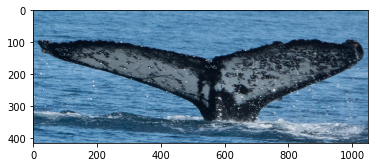

In [6]:
print(Train[0])
import cv2 #used for computer vision tasks such as reading image from file, changing color channels etc
import matplotlib.pyplot as plt #for plotting various graph, images etc.
def view_images(image): #function to view an image
    image_cv = cv2.imread(image) #reads an image
    plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)); #displays an image
view_images(Train[45])

In [7]:
from IPython.display import display # Allows the use of display() for DataFrames
Train_csv = pd.read_csv("../input/train.csv")
display(Train_csv.head(5))
print(Train_csv.shape)

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


(25361, 2)


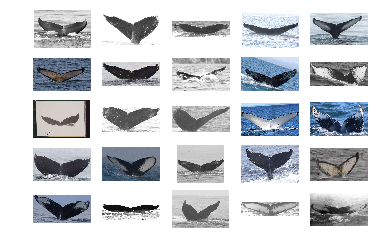

In [8]:
def plot_images(photos) : #to plot multiple image
    x=0
    for image in photos:
        image_cv = cv2.imread(image)
        plt.subplot(5, 5, x+1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
        plt.axis('off');
        x+=1
plot_images(Train[:25])

In [10]:
train_image=Train_csv['Image'].tolist()
train_image_Id=Train_csv['Id'].tolist()

In [ ]:
from tqdm import tqdm
data=list()
for x in train_image:
    for img in tqdm(Train):
        if ('../input/train/'+x==img):
            image_ar = cv2.imread(img)
            data.append(cv2.resize(image_ar,(50,50),interpolation=cv2.INTER_CUBIC))